In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../example_data/example_wp_log_peyton_manning.csv')

# Trend
## Default: Direct gradient, 5 changepoints

In [3]:
m = NeuralProphet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)
metrics

,SmoothL1Loss,MAE,RegLoss
0,0.401159,0.647825,0.0
1,0.368355,0.613471,0.0
2,0.363947,0.610112,0.0
3,0.355749,0.601677,0.0
4,0.360321,0.606369,0.0
5,0.358864,0.606057,0.0
6,0.362391,0.608124,0.0
7,0.356568,0.601001,0.0
8,0.372869,0.619627,0.0
9,0.357844,0.603213,0.0


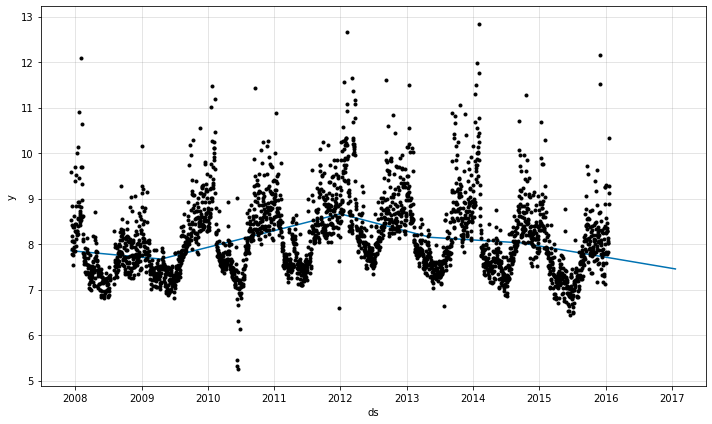

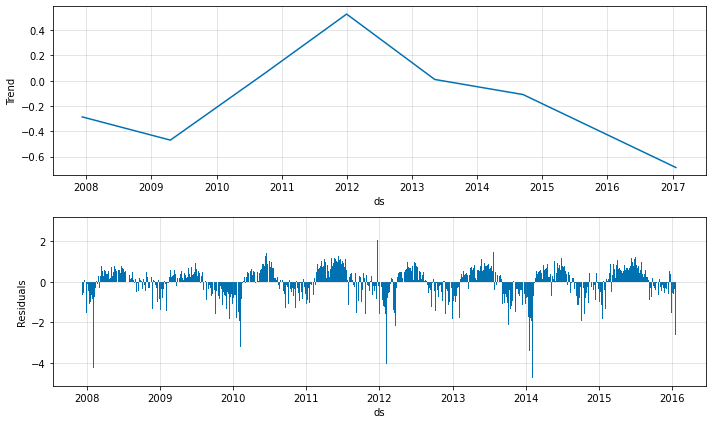

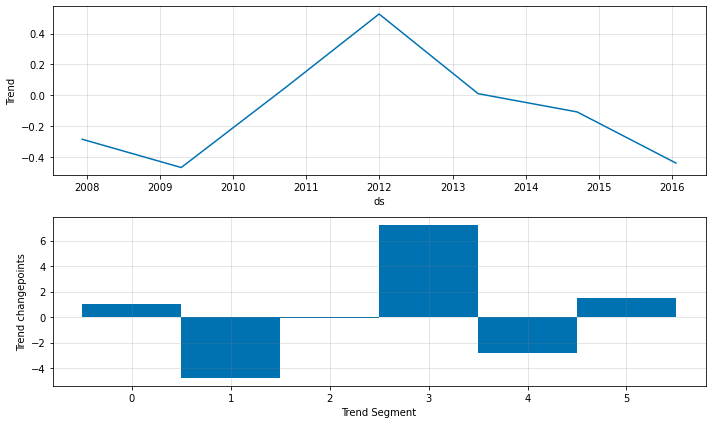

In [5]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Automatic sparse changepoint detection: 
2x regularized trend, 100 changepoints

In [6]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=2,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


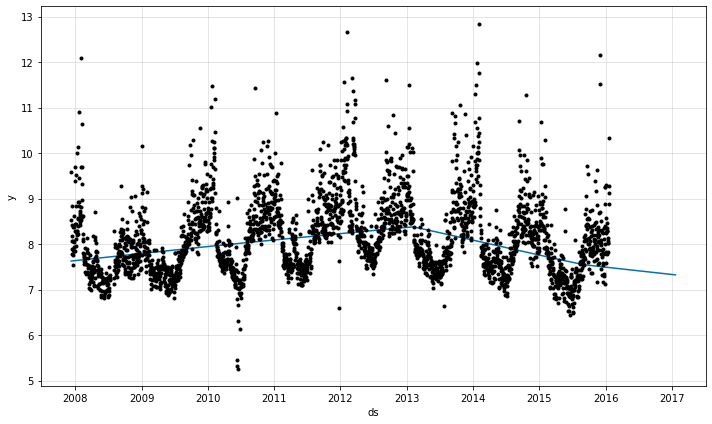

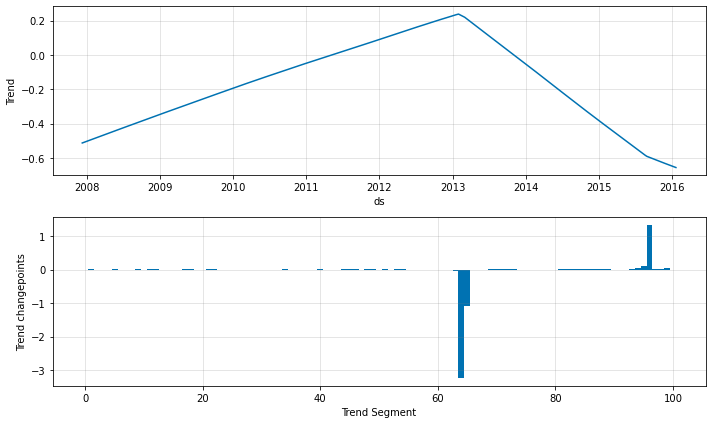

In [7]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Underfit: no changepoints

In [8]:
m = NeuralProphet(
    n_changepoints=0,
    trend_smoothness=0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df, validate_each_epoch=True)

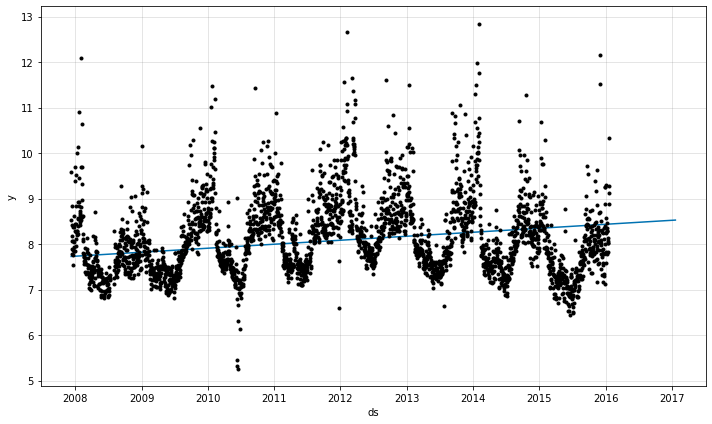

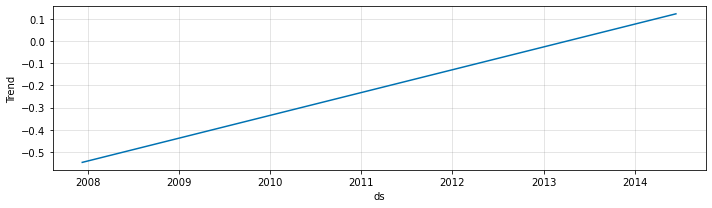

In [9]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Smooth Underfit: 10x regularized trend, 100 changepoints

In [10]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=5,
    trend_threshold=True,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


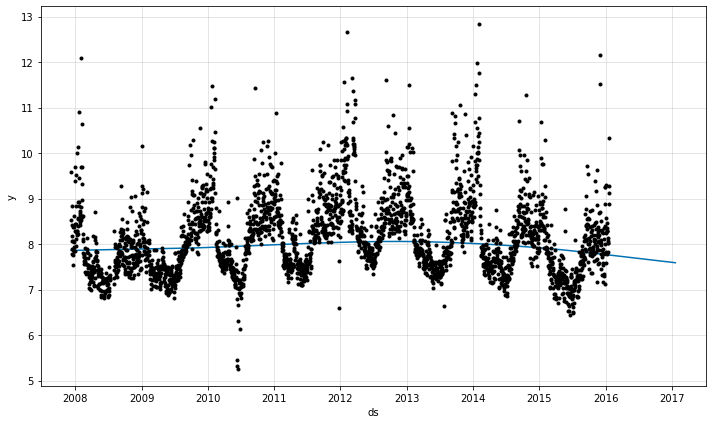

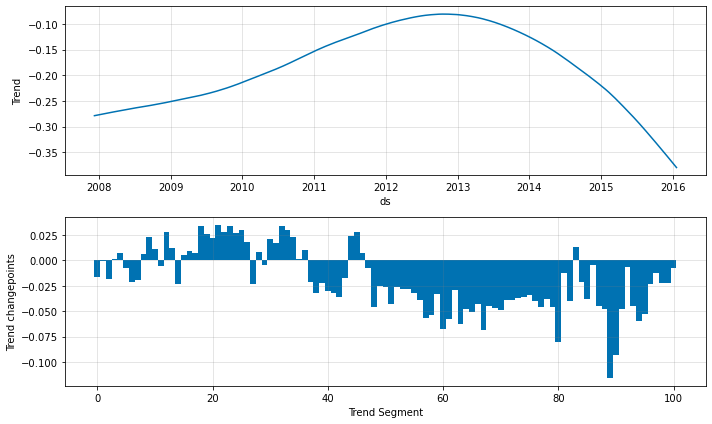

In [11]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Overfit: Direct gradient, 100 changepoints

In [12]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

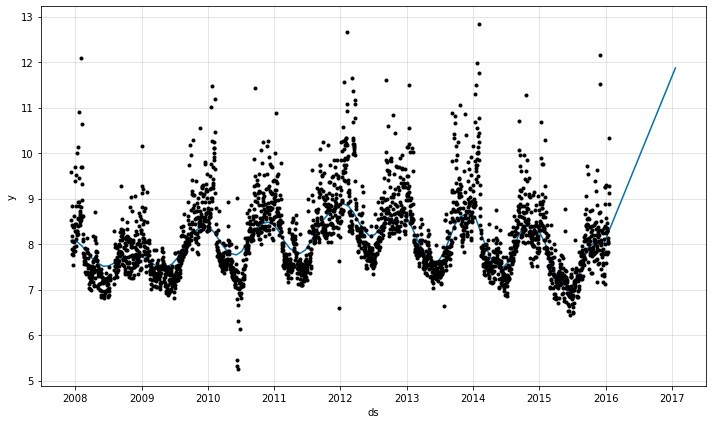

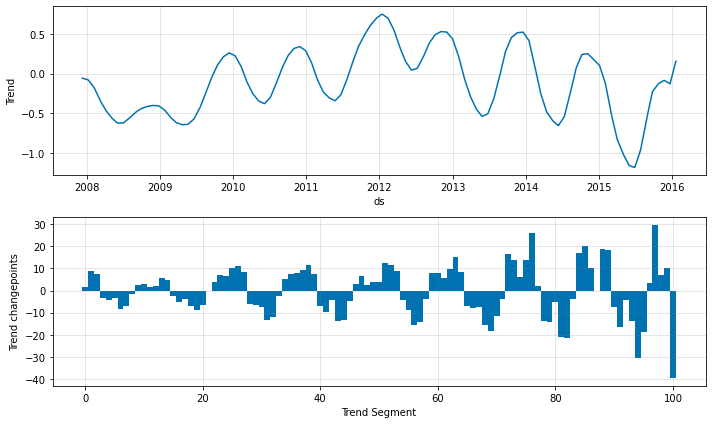

In [13]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Overfit: Direct gradient, discontinuous trend, 100 changepoints

In [14]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=-1,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

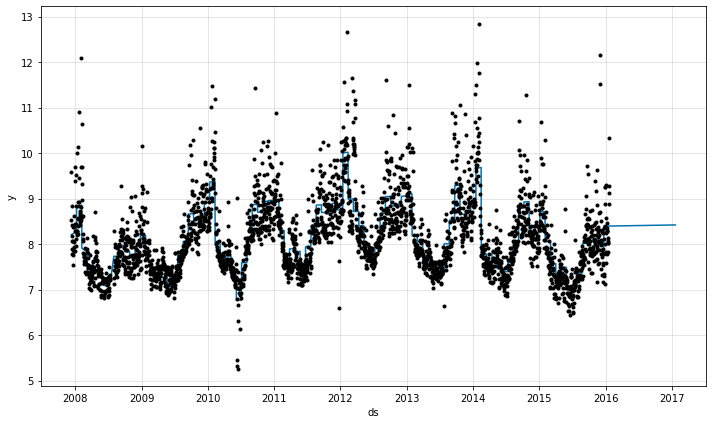

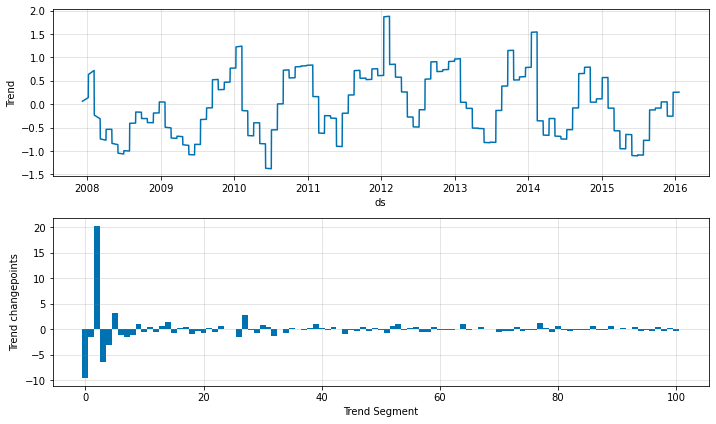

In [15]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Smooth overfit: 0.1xregularized trend, 100 changepoints

In [16]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=0.1,
    trend_threshold=True,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


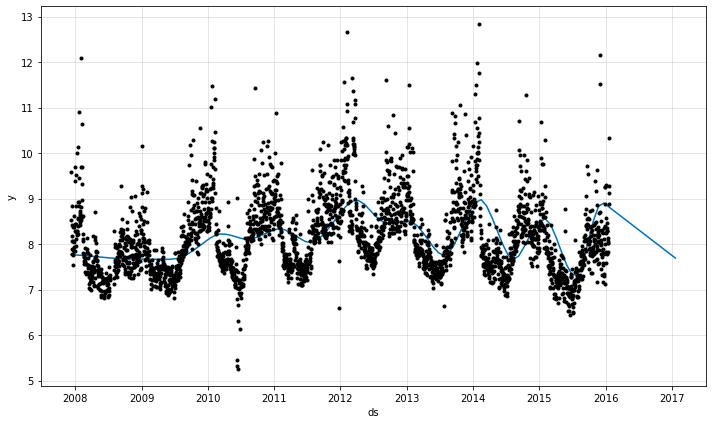

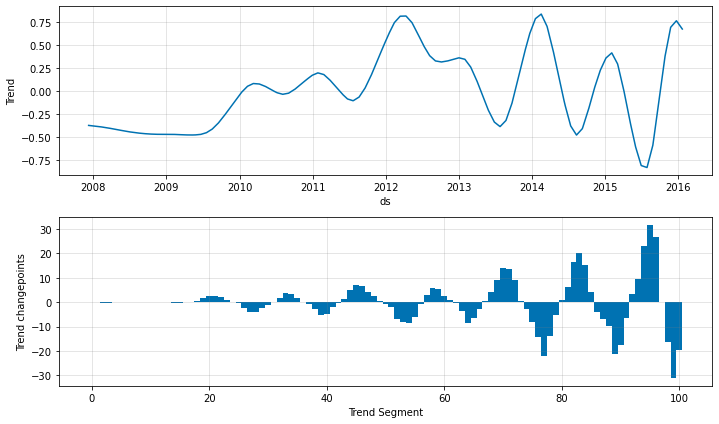

In [17]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()